# Table of Content
* [1.Descrizione dataset](#1.Descrizione-dataset)
* [2.Import librerie e dati](#2.Import-librerie-e-dati)
* [3.Analisi esplorativa dei dati](#3.Analisi-esplorativa-dei-dati)
    * [3.1.Consegne](#3.1.Consegne)

## 1.Descrizione dataset

Il seguente dataset è riferito ai dati ufficiali del governo italiano, disponibili su https://github.com/italia/covid19-opendata-vaccini

Nella cartella dati si possono trovare 6 tabelle in formato json e csv:


*   **consegne-vaccini-latest**: dati sul totale delle consegne giornaliere dei vaccini suddivise per regioni.
*   **vaccini-summary-latest**: dati sul totale delle consegne e somministrazioni avvenute sino ad oggi, includendo la percentuale di dosi somministrate (sul totale delle dosi consegnate) suddivise per regioni.
*   **somministrazioni-vaccini-latest**: dati sulle somministrazioni giornaliere dei vaccini suddivisi per regioni, fasce d'età e categorie di appartenenza dei soggetti vaccinati.
*   **somministrazioni-vaccini-summary-latest**: dati sul totale delle somministrazioni giornaliere per regioni e categorie di appartenenza dei soggetti vaccinati.
*   **punti-somministrazione-latest**: punti di somministrazione per ciascuna Regione e Provincia Autonoma.
*   **anagrafica-vaccini-summary-latest**: totali delle somministrazioni per fasce d'età.

## 2.Import librerie e dati

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,10)
import seaborn as sns
sns.set()

In [2]:
df_consegne = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv', 
                          parse_dates=['data_consegna'])

In [3]:
df_vaccini_aree_summary = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/vaccini-summary-latest.csv')

In [4]:
df_somministrazioni = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv')

In [5]:
df_punti_somministraz = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/punti-somministrazione-tipologia.csv')

In [6]:
df_vaccini_fasce_summary = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/anagrafica-vaccini-summary-latest.csv')

## 3.Analisi esplorativa dei dati

### 3.1.Consegne

In [7]:
df_consegne.shape

(1098, 8)

In [8]:
df_consegne.tail()

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
1093,VEN,Janssen,12800,2021-05-01,ITH,ITH3,5,Veneto
1094,VEN,Moderna,20500,2021-05-01,ITH,ITH3,5,Veneto
1095,VEN,Vaxzevria (AstraZeneca),151100,2021-05-01,ITH,ITH3,5,Veneto
1096,VEN,Pfizer/BioNTech,171990,2021-05-05,ITH,ITH3,5,Veneto
1097,VEN,Moderna,29300,2021-05-07,ITH,ITH3,5,Veneto


In [9]:
df_consegne.columns

Index(['area', 'fornitore', 'numero_dosi', 'data_consegna', 'codice_NUTS1',
       'codice_NUTS2', 'codice_regione_ISTAT', 'nome_area'],
      dtype='object')

In [10]:
tot_consegne = df_consegne.numero_dosi.sum()
tot_consegne

27391650

In [11]:
df_consegne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   area                  1098 non-null   object        
 1   fornitore             1098 non-null   object        
 2   numero_dosi           1098 non-null   int64         
 3   data_consegna         1098 non-null   datetime64[ns]
 4   codice_NUTS1          1098 non-null   object        
 5   codice_NUTS2          1098 non-null   object        
 6   codice_regione_ISTAT  1098 non-null   int64         
 7   nome_area             1098 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 68.8+ KB


In [12]:
df_consegne_t = df_consegne.set_index('data_consegna')
df_consegne_t.head()

,area,fornitore,numero_dosi,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
data_consegna,,,,,,,
2020-12-27,ABR,Pfizer/BioNTech,135,ITF,ITF1,13,Abruzzo
2020-12-30,ABR,Pfizer/BioNTech,7800,ITF,ITF1,13,Abruzzo
2021-01-05,ABR,Pfizer/BioNTech,3900,ITF,ITF1,13,Abruzzo
2021-01-07,ABR,Pfizer/BioNTech,3900,ITF,ITF1,13,Abruzzo
2021-01-11,ABR,Pfizer/BioNTech,3900,ITF,ITF1,13,Abruzzo


<AxesSubplot:ylabel='fornitore'>

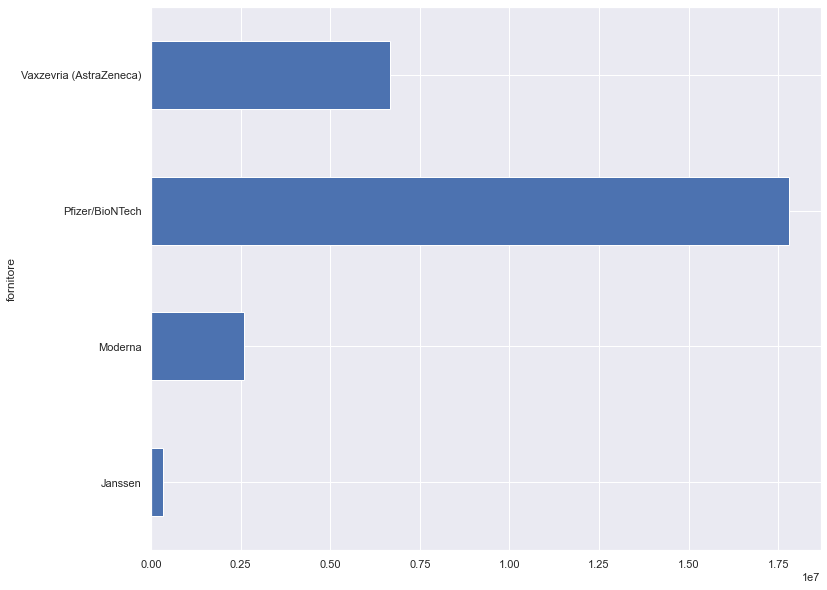

In [13]:
df_consegne.groupby('fornitore')['numero_dosi'].sum().plot(kind='barh')

<AxesSubplot:xlabel='data_consegna'>

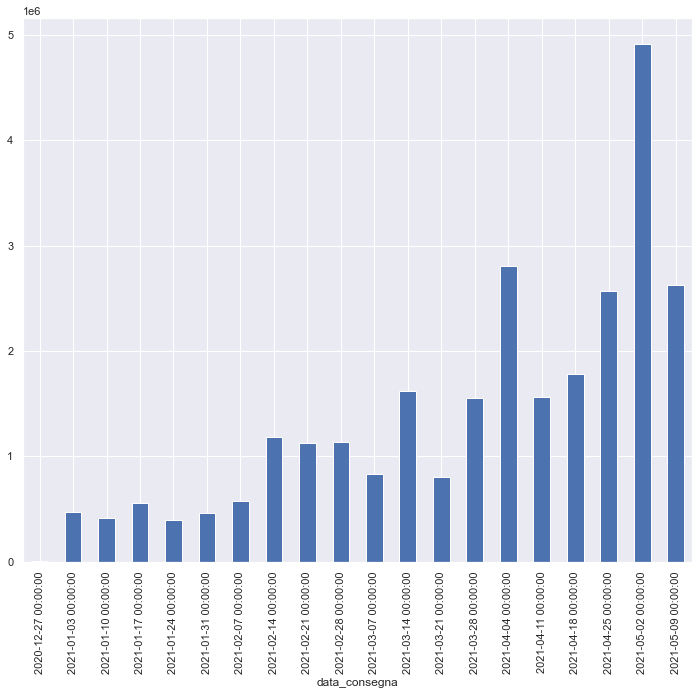

In [14]:
df_consegne_t.resample('W').sum()['numero_dosi'].plot(kind='bar')

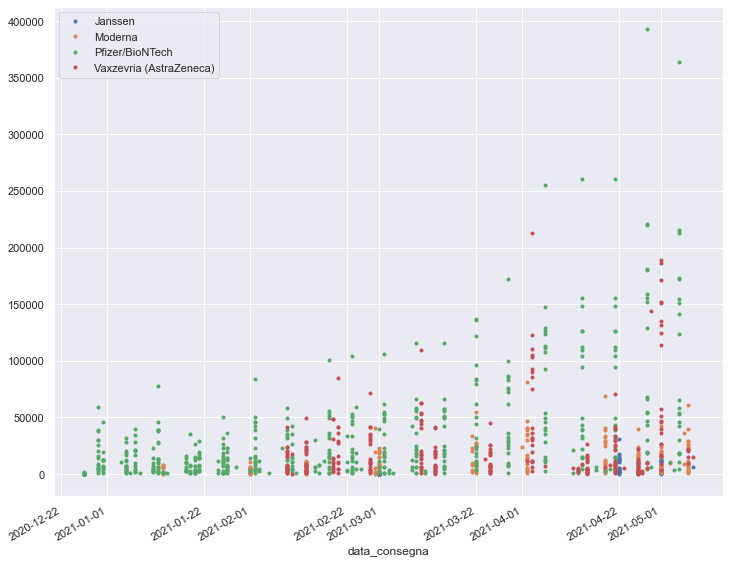

In [15]:
df_consegne_t.groupby('fornitore')['numero_dosi'].plot(linestyle='', marker='.')
plt.legend()

<AxesSubplot:xlabel='nome_area'>

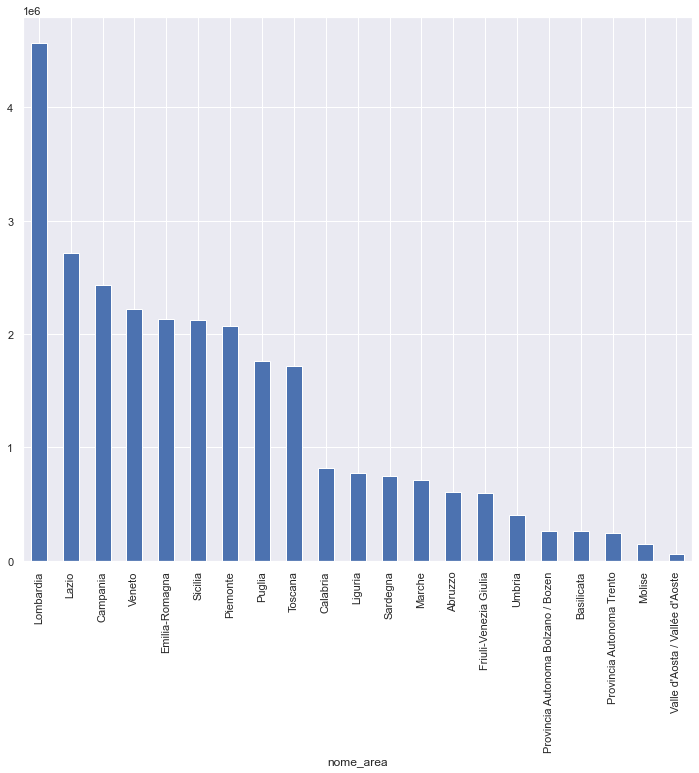

In [16]:
df_consegne.groupby('nome_area').sum()['numero_dosi'].sort_values(ascending=False).plot(kind='bar')

In [17]:
regioni = list(df_consegne_t.nome_area.unique())

In [18]:
fornitori = list(df_consegne_t.fornitore.unique())

In [19]:
c = 0
for r in regioni:
    
    df_r = df_consegne_t[df_consegne_t['nome_area']==r]
    i = 0
    for f in fornitori:
        df_f = df_r[df_r['fornitore']==f].resample('D')['numero_dosi'].sum().fillna(0)
        df_f = pd.DataFrame(df_f)
        df_f['fornitore']=f
        if i == 0:
            df_ = df_f.copy()
            i=1
        else:
            df_ = df_.append(df_f)

    df_['regione']=r
    if c == 0:
        df = df_.copy()
        c=1
    else:
        df = df.append(df_)

In [20]:
c = 0
d = {}
for r in regioni:
    
    df_r = df_consegne_t[df_consegne_t['nome_area']==r]
    i = 0
    for f in fornitori:
        df_f = df_r[df_r['fornitore']==f].resample('W')['numero_dosi'].sum().fillna(0)
        df_f = pd.DataFrame(df_f)
        df_f['fornitore']=f
        if i == 0:
            df_ = df_f.copy()
            i=1
        else:
            df_ = df_.append(df_f)

    df_['regione']=r
    if c == 0:
        df_settimanale = df_.copy()
        c=1
    else:
        df_settimanale = df_settimanale.append(df_)
    
    if df_consegne_t[df_consegne_t['nome_area']==r]['numero_dosi'].sum() == df_['numero_dosi'].sum():
        d[r] = 1
    else:
        d[r] = 0

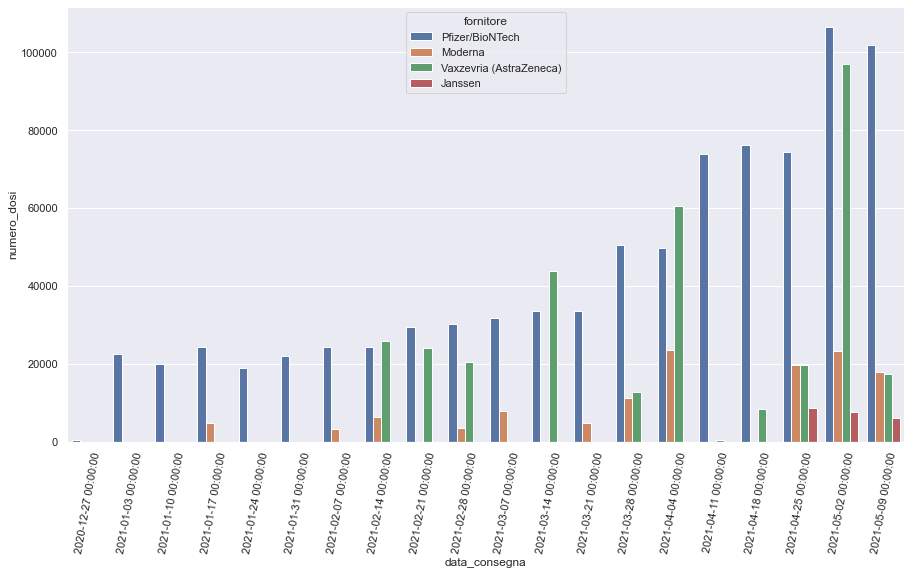

In [21]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
myFmt = DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data = df_settimanale, x=df_settimanale.index, y='numero_dosi', hue='fornitore', ci=None, ax=ax)

plt.xticks(rotation=80)

# ax.xaxis.set_major_formatter(myFmt)
plt.show()